<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/CV_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

In [3]:
# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 77.5MB/s]


In [4]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Input to hidden
        self.fc2 = nn.Linear(512, 256)      # Hidden layer
        self.fc3 = nn.Linear(256, 10)       # Output layer

    def forward(self, x):
        x = x.view(-1, 32*32*3)             # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [5]:
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)


In [6]:
num_epochs = 5
ls_losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/782], Loss: 1.6734
Epoch [1/5], Step [200/782], Loss: 1.9578
Epoch [1/5], Step [300/782], Loss: 1.5475
Epoch [1/5], Step [400/782], Loss: 1.5363
Epoch [1/5], Step [500/782], Loss: 1.4771
Epoch [1/5], Step [600/782], Loss: 1.5259
Epoch [1/5], Step [700/782], Loss: 1.4730
Epoch [2/5], Step [100/782], Loss: 1.1630
Epoch [2/5], Step [200/782], Loss: 1.5959
Epoch [2/5], Step [300/782], Loss: 1.3212
Epoch [2/5], Step [400/782], Loss: 1.5515
Epoch [2/5], Step [500/782], Loss: 1.1488
Epoch [2/5], Step [600/782], Loss: 1.4333
Epoch [2/5], Step [700/782], Loss: 1.6125
Epoch [3/5], Step [100/782], Loss: 1.0998
Epoch [3/5], Step [200/782], Loss: 1.4715
Epoch [3/5], Step [300/782], Loss: 1.4471
Epoch [3/5], Step [400/782], Loss: 1.3918
Epoch [3/5], Step [500/782], Loss: 1.1586
Epoch [3/5], Step [600/782], Loss: 1.3165
Epoch [3/5], Step [700/782], Loss: 1.4853
Epoch [4/5], Step [100/782], Loss: 1.2096
Epoch [4/5], Step [200/782], Loss: 1.1925
Epoch [4/5], Step [300/782], Loss:

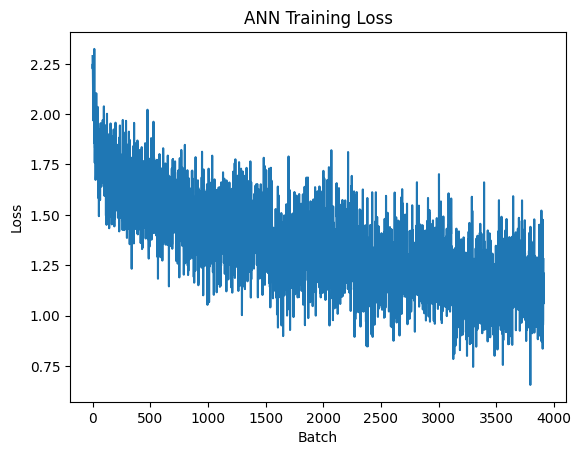

In [7]:
plt.plot(ls_losses)
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("ANN Training Loss")
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_ann(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='macro')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='macro')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='macro')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")


ANN Accuracy: 0.5279
ANN Precision: 0.5242
ANN Recall: 0.5279
ANN F1-Score: 0.5225


In [9]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64*8*8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64*8*8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [10]:
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/782], Loss: 1.5491
Epoch [1/5], Step [200/782], Loss: 1.3898
Epoch [1/5], Step [300/782], Loss: 1.4105
Epoch [1/5], Step [400/782], Loss: 1.3294
Epoch [1/5], Step [500/782], Loss: 1.2518
Epoch [1/5], Step [600/782], Loss: 0.8743
Epoch [1/5], Step [700/782], Loss: 0.8669
Epoch [2/5], Step [100/782], Loss: 1.0357
Epoch [2/5], Step [200/782], Loss: 0.8617
Epoch [2/5], Step [300/782], Loss: 0.8513
Epoch [2/5], Step [400/782], Loss: 1.1379
Epoch [2/5], Step [500/782], Loss: 0.9751
Epoch [2/5], Step [600/782], Loss: 0.5993
Epoch [2/5], Step [700/782], Loss: 0.6660
Epoch [3/5], Step [100/782], Loss: 1.0382
Epoch [3/5], Step [200/782], Loss: 0.6494
Epoch [3/5], Step [300/782], Loss: 0.5741
Epoch [3/5], Step [400/782], Loss: 0.6536
Epoch [3/5], Step [500/782], Loss: 0.6884
Epoch [3/5], Step [600/782], Loss: 0.6223
Epoch [3/5], Step [700/782], Loss: 0.4422
Epoch [4/5], Step [100/782], Loss: 0.3357
Epoch [4/5], Step [200/782], Loss: 0.4580
Epoch [4/5], Step [300/782], Loss:

In [11]:
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='macro')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='macro')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='macro')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.7214
CNN Precision: 0.7301
CNN Recall: 0.7214
CNN F1-Score: 0.7223


In [12]:
import pandas as pd

data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)


  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5279   0.524196  0.5279  0.522465
1   CNN    0.7214   0.730069  0.7214  0.722261


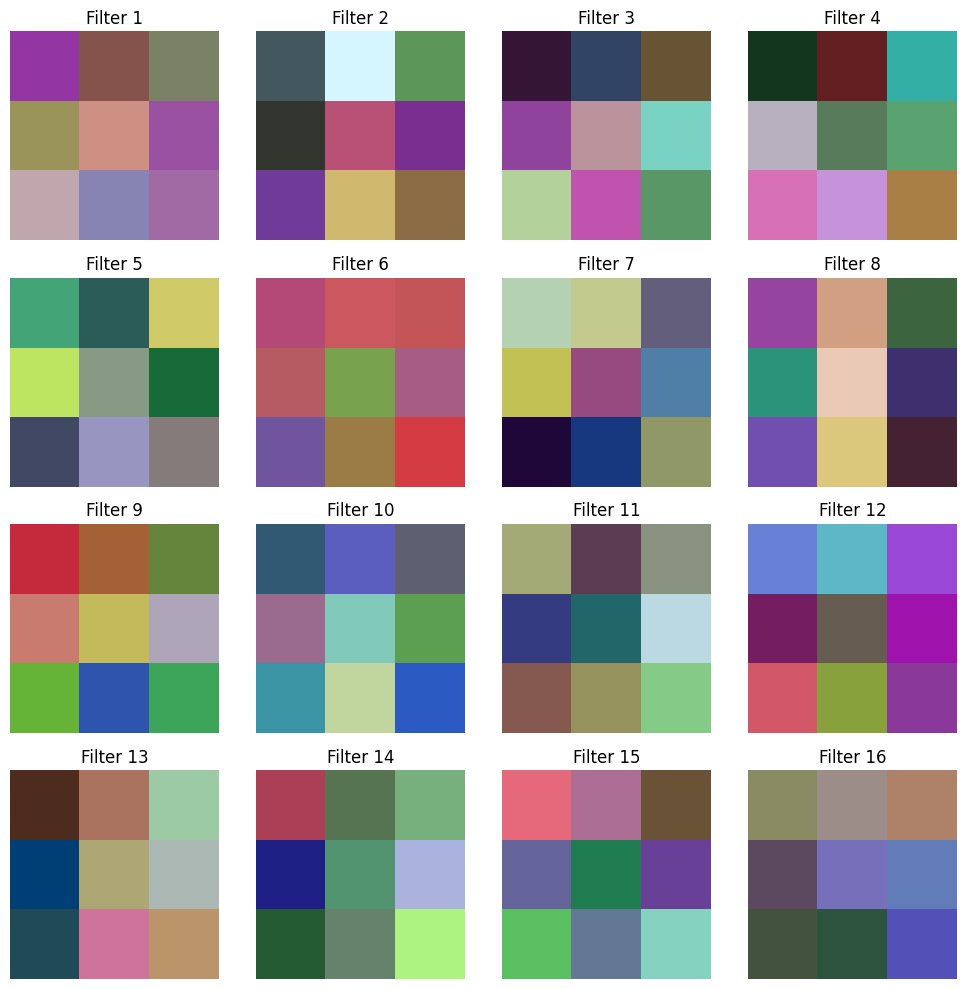

In [13]:
# Get the weights of the first convolutional layer
first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()

# Normalize the weights for visualization
min_w = first_conv_layer_weights.min()
max_w = first_conv_layer_weights.max()
first_conv_layer_weights = (first_conv_layer_weights - min_w) / (max_w - min_w)

# Plot the filters (show up to 16 filters)
num_filters = first_conv_layer_weights.shape[0]
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    filter_img = first_conv_layer_weights[i].transpose(1, 2, 0)  # Convert (C,H,W) -> (H,W,C)
    axes[i].imshow(filter_img)
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [17]:
# Initialize CNN with augmented data
model_cnn_augmented = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_augmented = optim.Adam(model_cnn_augmented.parameters(), lr=0.001)

print("Training CNN with Data Augmentation...")

num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model_cnn_augmented(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")

Training CNN with Data Augmentation...
Epoch [1/5], Step [100/782], Loss: 1.8023
Epoch [1/5], Step [200/782], Loss: 1.5557
Epoch [1/5], Step [300/782], Loss: 1.5938
Epoch [1/5], Step [400/782], Loss: 1.3693
Epoch [1/5], Step [500/782], Loss: 1.4763
Epoch [1/5], Step [600/782], Loss: 1.7267
Epoch [1/5], Step [700/782], Loss: 1.4519
Epoch [2/5], Step [100/782], Loss: 0.9542
Epoch [2/5], Step [200/782], Loss: 1.1060
Epoch [2/5], Step [300/782], Loss: 0.9638
Epoch [2/5], Step [400/782], Loss: 1.0627
Epoch [2/5], Step [500/782], Loss: 1.0452
Epoch [2/5], Step [600/782], Loss: 0.9856
Epoch [2/5], Step [700/782], Loss: 0.9504
Epoch [3/5], Step [100/782], Loss: 1.0569
Epoch [3/5], Step [200/782], Loss: 1.0062
Epoch [3/5], Step [300/782], Loss: 0.9898
Epoch [3/5], Step [400/782], Loss: 0.9513
Epoch [3/5], Step [500/782], Loss: 0.9830
Epoch [3/5], Step [600/782], Loss: 0.9262
Epoch [3/5], Step [700/782], Loss: 0.9528
Epoch [4/5], Step [100/782], Loss: 1.0270
Epoch [4/5], Step [200/782], Loss: 1.

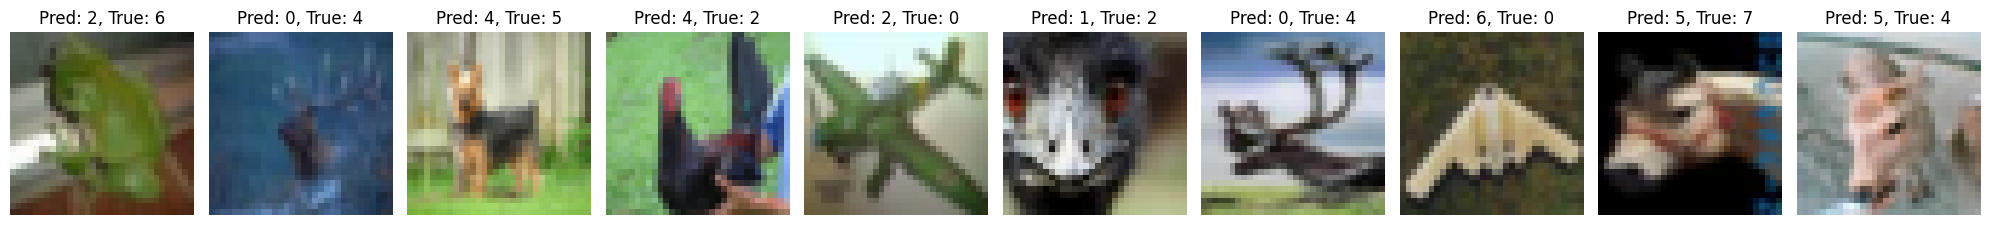

In [18]:
# Choose the model to evaluate
model_to_evaluate = model_cnn_augmented if model_cnn_augmented else model_cnn
model_to_evaluate.eval()

incorrect_preds = []
incorrect_labels = []
incorrect_images = []

with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.clone()  # Keep a copy for visualization
        images, labels = images.to(device), labels.to(device)

        outputs = model_to_evaluate(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                # Denormalize the image for visualization
                img = images_cpu[i].numpy().transpose(1, 2, 0)
                img = 0.5 * img + 0.5  # Undo normalization
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)

# Display up to 10 incorrect predictions
num_to_display = min(len(incorrect_images), 10)
fig, axes = plt.subplots(nrows=1, ncols=num_to_display, figsize=(20, 4))

if num_to_display > 0:
    for i in range(num_to_display):
        axes[i].imshow(incorrect_images[i])
        axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions to display.")


In [19]:
# Define data augmentation transforms
transform_train_augmented = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset with augmentation for training
train_dataset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                       download=True, transform=transform_train_augmented)

# Create a new data loader for the augmented training data
train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)